### Week 7

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
from matplotlib.colors import LogNorm 
from matplotlib import cm
from mdtraj import Trajectory

In [38]:
#Using mdtraj, in a jupyter notebook, 
#align your alphafold predictions to the crystal structure and make a bar plot showing the RMSD of each predicted structure to the crystal structure based on alpha-carbons and based on the full backbone and side-chains. 
#Does alphafold get everything right or just the backbone structure?

pdb = md.load("1LYS_1.pdb")
alphafold = md.load("1LYS/unrelaxed_model_1_pred_0.pdb")


alphafold_alpha_carbons = alphafold.atom_slice(alphafold.topology.select("name CA"))
alphafold_backbone = alphafold.atom_slice(alphafold.topology.select("backbone"))
alphafold_side_chains = alphafold.atom_slice(alphafold.topology.select("sidechain"))
#backbone_side_chains = alphafold.atom_slice(alphafold.topology.select("backbone and sidechain"))
print(type(alphafold_alpha_carbons))

pdb_alpha_carbons = pdb.atom_slice(pdb.topology.select("name CA"))
pdb_backbone = pdb.atom_slice(pdb.topology.select("backbone"))
pdb_side_chains = pdb.atom_slice(pdb.topology.select("sidechain"))

print(type(pdb_alpha_carbons))
                    
#aligned = md.Trajectory.superpose(reference = pdb, self = alphafold)
#rmsd = md.rmsd(target = alphafold, reference = pdb, precentered = True)


#alphafold aligned to pdb all
alphafold_aligned = alphafold.superpose(pdb, atom_indices = [0,998])

#alphafold alpha carbons aligned to pdb alpha carbons
aligned_to_alpha_ca_rmsd = md.rmsd(alphafold_alpha_carbons, reference=pdb_alpha_carbons)

#alphafold backbone aligned to pdb backbone
aligned_to_backbone_rmsd = md.rmsd(alphafold_backbone, reference=pdb_backbone)

#alphafold backbone aligned to sidechain
#aligned_to_sidechain_rmsd = md.rmsd(alphafold_side_chains, reference = pdb_side_chains)

print(type(alphafold_aligned))
print(type(aligned_to_backbone_rmsd))

<class 'mdtraj.core.trajectory.Trajectory'>
<class 'mdtraj.core.trajectory.Trajectory'>
<class 'mdtraj.core.trajectory.Trajectory'>
<class 'numpy.ndarray'>


NameError: name 'aligned_to_alpha_ca_rmsd' is not defined

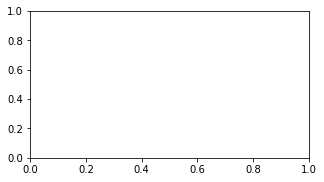

In [2]:


#bar plot

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

#ax.scatter(x, y, c ="blue")
#ax.plot(alphafold_aligned, c = "blue", label = "Alphafold aligned to PDB")
plt.plot(aligned_to_alpha_ca_rmsd, c = "green", label = "Alpha carbons aligned")
plt.plot(aligned_to_backbone_rmsd, c = "red", label = "Backbone aligned")
#ax.plot(aligned_to_sidechain_rmsd, c = "yellow", label = "Side chains")

    
#axA.set_xlabel("")
ax.set_ylabel(r"RMSD")
plt.title("RMSD of Alphafold Prediction Aligned to PDB")
plt.legend()
plt.show()

In [ ]:
# From your alphafold greene output, make a picture of your protein colored by PLDDT score (stored in B-factor column), and put it in your figures folder. Which residues should we be confident in?

In [ ]:
#See figures folder for rendering
#Can be confident about helices